## Day-27:-

### Handling Imbalanced Datasets:-

In [179]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   
import pandas as pd


In [180]:
#Set the random seed for reproducibility
np.random.seed(123)
# Create a dataframe with two classes
n_sample=1000
class_0_ratio=0.9
n_class_0=int(n_sample*class_0_ratio)
n_class_1=n_sample-n_class_0

In [181]:
n_class_0,n_class_1

(900, 100)

In [182]:
class_0=pd.DataFrame({
    "feature_1":np.random.normal(loc=0,scale=1,size=n_class_0),
    "feature_2":np.random.normal(loc=0,scale=1,size=n_class_0),
    "target":[0]*n_class_0
    
})
class_1=pd.DataFrame({
    "feature_1":np.random.normal(loc=2,scale=1,size=n_class_1),
    "feature_2":np.random.normal(loc=2,scale=1,size=n_class_1),
    "target":[1]*n_class_1
    
})

In [183]:
df=pd.concat([class_0,class_1]).reset_index(drop = True)

In [184]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [185]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [186]:
df_majority=df[df["target"]==0]
df_minorty=df[df["target"]==1]

### **Perform Upsampling:-**
```
we can perform some upsamlaing method by which we can ad some other sample of data.

In [187]:
from sklearn.utils import resample

In [188]:
new_df=resample(df_minorty,n_samples=len(df_majority),random_state=42,replace=True)

In [189]:
new_df["target"].value_counts()

target
1    900
Name: count, dtype: int64

In [190]:
df=pd.concat([new_df,df_majority])

In [191]:
df.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [192]:
df["target"].value_counts()

target
1    900
0    900
Name: count, dtype: int64

### Down Sampling:-

In [193]:
df_majority['target'].value_counts()

target
0    900
Name: count, dtype: int64

In [194]:
df_minorty["target"].value_counts()

target
1    100
Name: count, dtype: int64

In [195]:
new_df_minorty=resample(df_majority,n_samples=len(df_minorty),replace=True,random_state=42)

In [196]:
df1=pd.concat([new_df_minorty,df_minorty])

In [197]:
df1.shape

(200, 3)

In [198]:
df1["target"].value_counts()

target
0    100
1    100
Name: count, dtype: int64

### SMOTE():-
```
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [199]:
from sklearn.datasets import make_classification

In [200]:
#x is independent
#y is dependent
x,y=make_classification(n_samples=1000,n_features=2,n_clusters_per_class=1,weights=[0.90,],random_state=1,n_redundant=0)

In [201]:
x,y

(array([[ 1.53682958, -1.39869399],
        [ 1.55110839,  1.81032905],
        [ 1.29361936,  1.01094607],
        ...,
        [-0.55662536, -0.15983725],
        [ 1.00499902,  0.93628981],
        [ 1.46210987,  1.14497791]]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [202]:
import pandas as pd
df1=pd.DataFrame(x,columns =['f1','f2'])
df2=pd.DataFrame(y,columns =['target'])
final_df=pd.concat([df1,df2],axis = 1)

In [203]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [204]:
final_df["target"].value_counts()

target
0    894
1    106
Name: count, dtype: int64

```
Scatterplot of both class:-

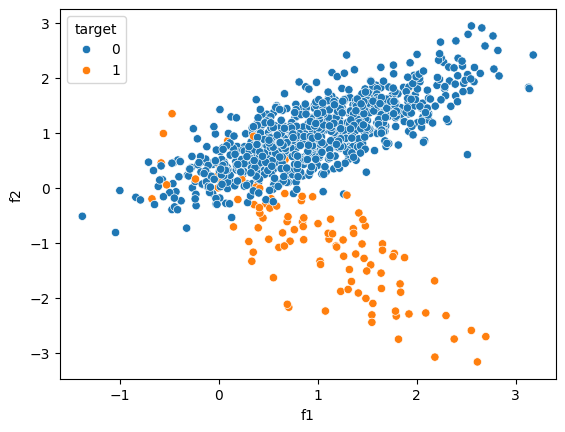

In [205]:
sns.scatterplot(x="f1",y="f2",data=final_df,hue="target")
plt.show()

In [206]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [207]:
from imblearn.over_sampling import SMOTE

In [208]:
oversample=SMOTE()
x,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [209]:
x.shape

(1788, 2)

In [210]:
y.shape

(1788,)

In [211]:
len(y[y==0])

894

In [212]:
len(y[y==1])

894

In [213]:
df1=pd.DataFrame(x,columns =['f1','f2'])
df2=pd.DataFrame(y,columns =['target'])
oversample_df=pd.concat([df1,df2],axis = 1)
oversample_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


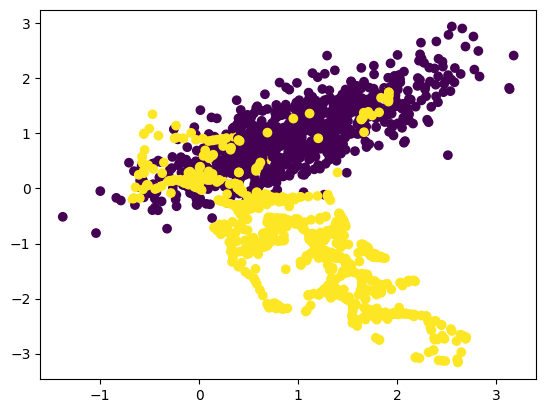

In [214]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df["target"])

In [215]:
o

NameError: name 'o' is not defined

### Data Interpolation:-
```
Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy, and Pandas. Here is an example of how to perform data interpolation using the NumPy library:

#### 1.Linear interpolation:-

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

<Axes: >

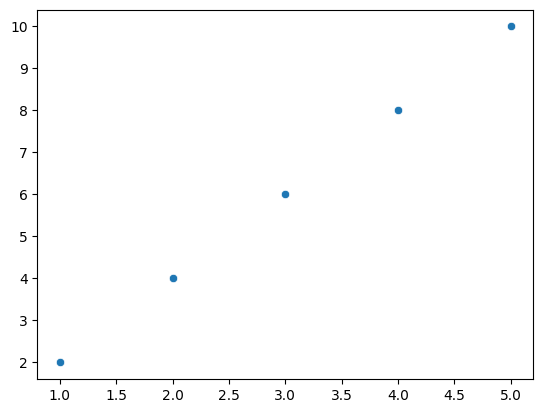

In [ ]:
sns.scatterplot(x=x,y=y)

In [ ]:
x_new=np.linspace(1,5,10)
y_inter=np.interp(x_new,x,y)

In [ ]:
y_inter

array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
        6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ])

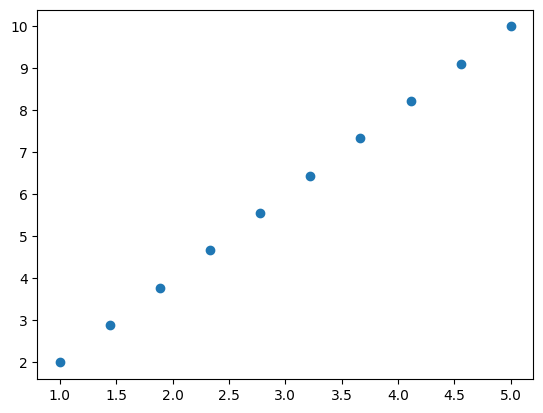

In [ ]:
plt.scatter(x_new,y_inter)

### Cubic interpolation with scipy:-

In [ ]:
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

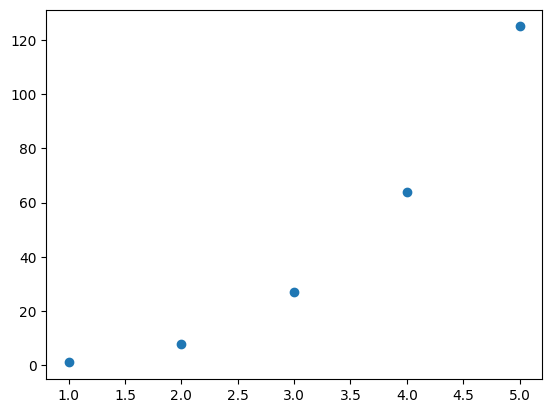

In [ ]:
plt.scatter(x,y)

In [ ]:
from scipy.interpolate import interp1d

Create a cubic interpolation function:-

In [ ]:
f=interp1d(x,y,kind="cubic")

In [ ]:
x_new=np.linspace(1,5,20)
y_interp=f(x_new)

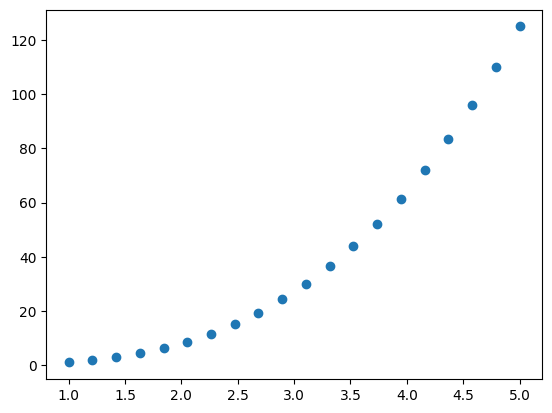

In [ ]:
plt.scatter(x_new,y_interp)

### 3.Polynomial Interpolation:-

In [ ]:
x=np.array([1,2,3,4,5])
y=np.array([1,4,9,16,25])

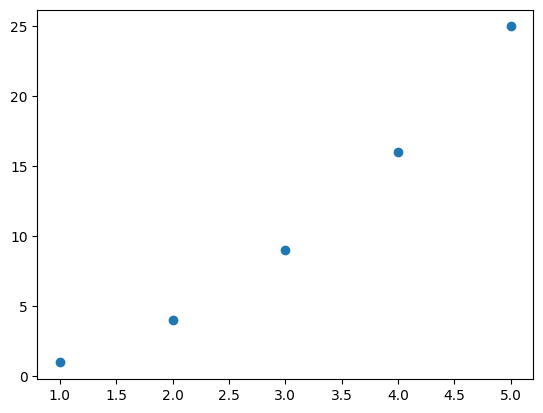

In [ ]:
plt.scatter(x,y)

In [ ]:
p=np.polyfit(x,y,4)

In [ ]:
x_new=np.linspace(1,5,20)
y_interp=np.polyval(p,x_new)

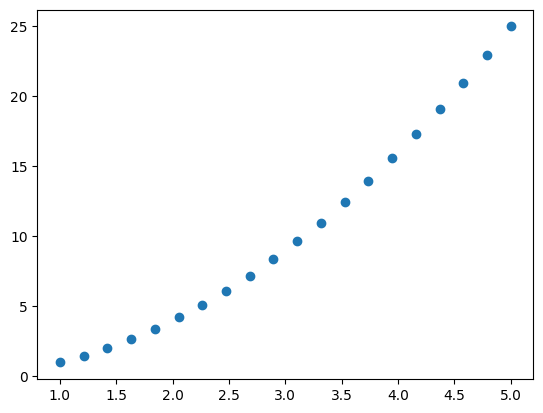

In [ ]:
plt.scatter(x_new,y_interp)

## Handling Outliers:-

## **5-Number Summary:-**
```
1.Minimum Value

2.Q1-25 percentile

3.Median

4.Q3-75 percentile

5.Maximum value


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
lis_marks=[-232,-34,34,24,34,34,34,56,67,56,78,67,56,89,1000,226,500]

In [ ]:
np.percentile(lis_marks,[75])

array([86.25])

## **For finding Outliers:-**
### **[Lower Fence<---> Higher Fence]**

In [ ]:
Q1=np.percentile(lis_marks,[25])
Q2=np.percentile(lis_marks,[50])
Q3=np.percentile(lis_marks,[75])

In [ ]:
minimum,Q1,Q2,Q3,maximum=np.quantile(lis_marks,[0.0,0.25,0.50,0.75,1.0])

In [ ]:
maximum

1000.0

In [ ]:
IQR=Q3-Q1

In [ ]:
IQR

46.75

In [ ]:
Lower_fence=Q1-1.5*(IQR)

In [ ]:
Lower_fence

-30.625

In [ ]:
Upper_fence=Q1+1.5*(IQR)

In [ ]:
Upper_fence

109.625

In [ ]:
outliers=[]
for i in lis_marks:
    if i>=(-30.625) and i<109.625:
        print(i,"This is not an Outlier value")
    else:
        outliers.append(i)
outliers

24 This is not an Outlier value
34 This is not an Outlier value
34 This is not an Outlier value
34 This is not an Outlier value
56 This is not an Outlier value
67 This is not an Outlier value
56 This is not an Outlier value
78 This is not an Outlier value
67 This is not an Outlier value
56 This is not an Outlier value
89 This is not an Outlier value


[1000, 226, 500]

<Axes: >

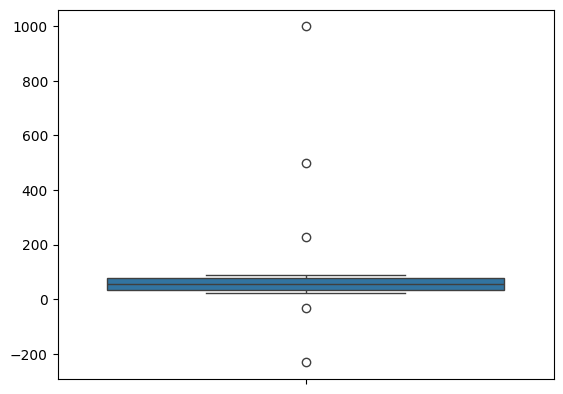

In [216]:
sns.boxplot(lis_marks)

## Feature Extraction:-
```
Feature Extraction is a process of selecting and extracting the most importent feature from raw data.

### Feature Scaling:-
```
To scale our feature data

```
1.Standarized
2.Noramalization

### Feature Selection:-
```
Selcting most importent feature.

## Feature Scaling:-
```
Scale down our data 

### 1.StandardScaler:-

```
mean=0 std=1

Z-Score=    Xi-mean(X)
           ------------
              std(x)

In [218]:
df=sns.load_dataset("tips")

In [219]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


```
Standard Scaling:-

In [262]:
total_bill=list(df["total_bill"])

In [263]:
mean_data=np.mean(total_bill)
mean_data

19.78594262295082

In [264]:
std_data=np.std(total_bill)
std_data

8.884150577771132

In [265]:
new_data=[]
for i in total_bill:
    z_score=(i-mean_data)/std_data
    new_data.append(z_score)


In [276]:
new_data1=pd.DataFrame(new_data,columns=["scaler_total_bill"])

new_data1

,scaler_total_bill
0,-0.314711
1,-1.063235
2,0.137780
3,0.438315
4,0.540745
...,...
239,1.040511
240,0.832275
241,0.324630
242,-0.221287


In [278]:
data=pd.concat([df["total_bill"],new_data1],axis=1)

<Axes: xlabel='scaler_total_bill', ylabel='Count'>

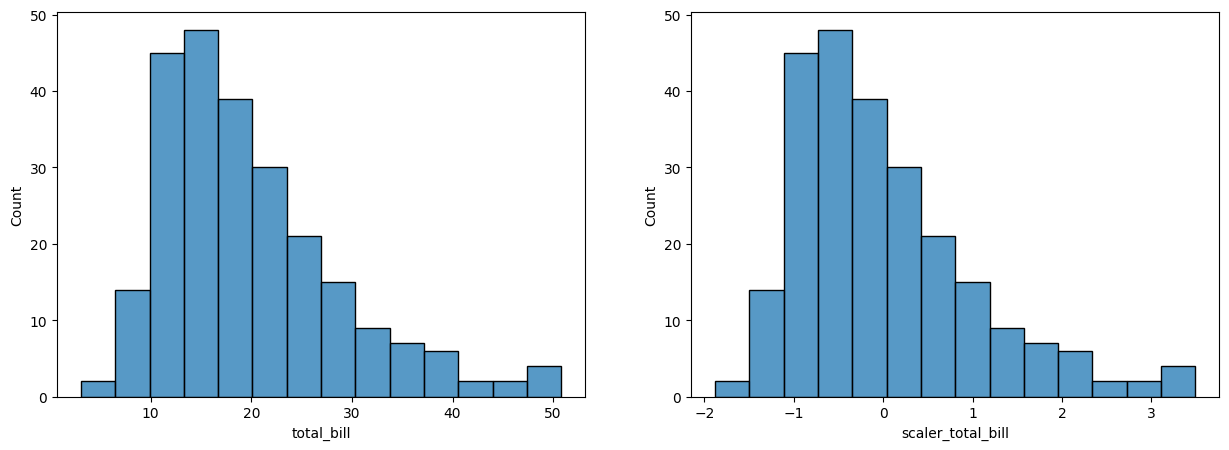

In [285]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data["total_bill"])
plt.subplot(1,2,2)
sns.histplot(data["scaler_total_bill"])

In [279]:
data.head()

,total_bill,scaler_total_bill
0,16.99,-0.314711
1,10.34,-1.063235
2,21.01,0.137780
3,23.68,0.438315
4,24.59,0.540745


In [286]:
from sklearn.preprocessing import StandardScaler

In [287]:
scaler=StandardScaler()

In [297]:
data["new_total_bill"]=scaler.fit_transform(data[["total_bill"]])

In [298]:
data.head()

,total_bill,scaler_total_bill,new_total_bill
0,16.99,-0.314711,-0.314711
1,10.34,-1.063235,-1.063235
2,21.01,0.137780,0.137780
3,23.68,0.438315,0.438315
4,24.59,0.540745,0.540745


<Axes: xlabel='new_total_bill', ylabel='Count'>

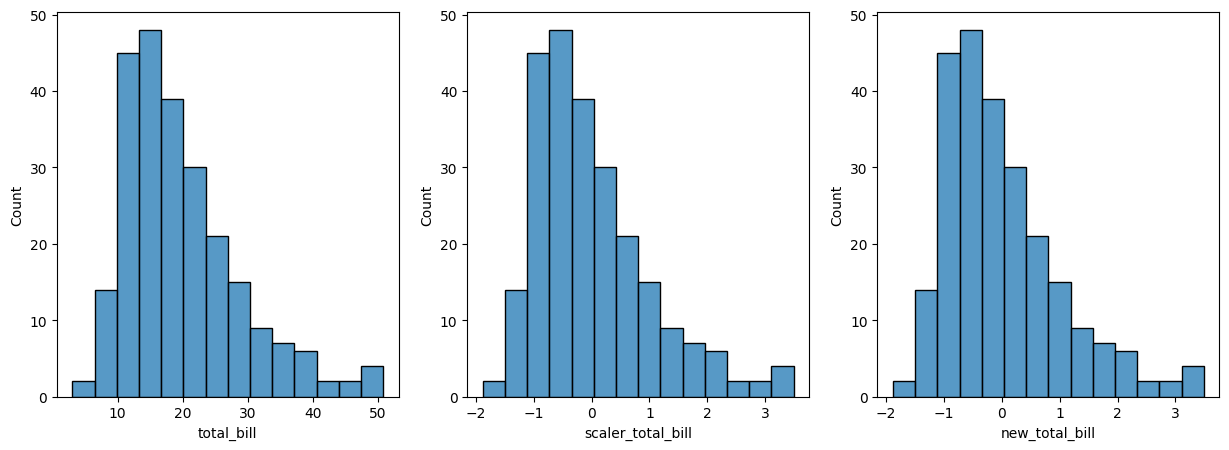

In [303]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.histplot(data["total_bill"])
plt.subplot(1,3,2)
sns.histplot(data["scaler_total_bill"])
plt.subplot(1,3,3)
sns.histplot(data["new_total_bill"])

### Normalization:-
```
convert the data in this range(0 to 1 )

X         = X  -  X
 scaled      i    min
            ----------
            X  -  X
             max   min 

In [305]:
from sklearn.preprocessing import MinMaxScaler

In [306]:
scaler=MinMaxScaler()

In [313]:
df["scaler_total_data"]=scaler.fit_transform(df[["total_bill"]])

In [315]:
df.drop(["scaler_total_data_"],axis=1,inplace=True)

In [316]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,scaler_total_data
0,16.99,1.01,Female,No,Sun,Dinner,2,0.291579
1,10.34,1.66,Male,No,Sun,Dinner,3,0.152283
2,21.01,3.50,Male,No,Sun,Dinner,3,0.375786
3,23.68,3.31,Male,No,Sun,Dinner,2,0.431713
4,24.59,3.61,Female,No,Sun,Dinner,4,0.450775


<Axes: xlabel='scaler_total_data', ylabel='Count'>

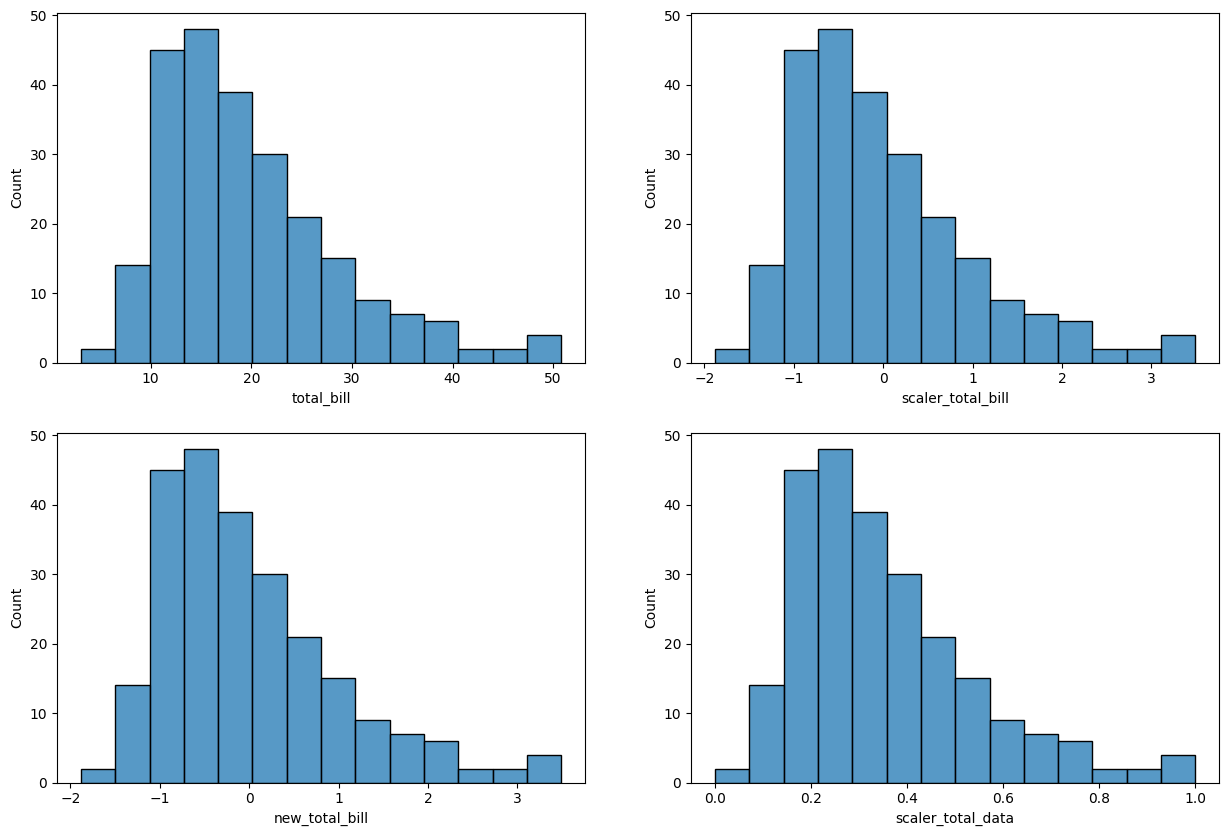

In [320]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(data["total_bill"])
plt.subplot(2,2,2)
sns.histplot(data["scaler_total_bill"])
plt.subplot(2,2,3)
sns.histplot(data["new_total_bill"])
plt.subplot(2,2,4)
sns.histplot(df["scaler_total_data"])

### Unit Vector :-


In [322]:
df=sns.load_dataset("iris")

In [323]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [324]:
from sklearn.preprocessing import normalize

In [329]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [331]:
normalize(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [335]:
df=pd.DataFrame(normalize(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]),columns=['new_sepal_length', 'new_sepal_width', 'new_petal_length', 'new_petal_width'])

In [336]:
df.head()

,new_sepal_length,new_sepal_width,new_petal_length,new_petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
